# Exercise 10

Importing essencial libraries:

Let's analyze 3 big cities with the following measures:<br>
1. Complexity measure (by Shannon's Entropy Formula).<br>
<s>2. Average shortest path length</s>. It wasn't possible to calculate this measure for all cities due to its high time complexity. More details at this report end.<br>
3. Clustering coefficient.
4. Degree distribution.

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import collections
from numpy import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import time

## São Paulo

In [5]:
G = nx.read_graphml("Sao_Paulo.graphml.xml")
print(G.number_of_nodes())

112039


In [6]:
print(G.number_of_edges())

289314


Defining the degree distribution function and calling it:

In [7]:
def degreeDistribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues = arange(0,maxk+1)
    Pk = np.zeros(maxk+1) #create an array of zeros for counting the degree distribution
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) #converting the values to probabilities
    return kvalues,Pk

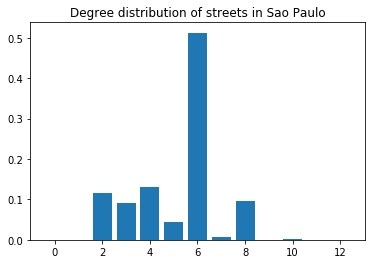

In [8]:
ks, Pk = degreeDistribution(G)

plt.figure()
plt.bar(ks, height = Pk)
plt.title("Degree distribution of streets in Sao Paulo")
plt.show()

In [9]:
def shannonEntropy(G):
    k,Pk = degreeDistribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

G is a multigraph, and for calculating the average clustering, we must turn it to a normal graph:

In [10]:
G = nx.Graph(G)

At last, calculating the measures for Sao Paulo:

In [11]:
print("Average Clustering Coefficient of Sao Paulo: ", nx.average_clustering(G))
print("Shannon Entropy of the network of Sao Paulo: ", shannonEntropy(G))

Average Clustering Coefficient of Sao Paulo:  0.05099771805650584
Shannon Entropy of the network of Sao Paulo:  1.304174184361486


## Paris

Now, let's get the same measures from Paris:

In [12]:
G = nx.read_graphml("Paris.graphml.xml")
print(G.number_of_nodes())

10104


In [13]:
print(G.number_of_edges())

19770


Getting the degree distribution:

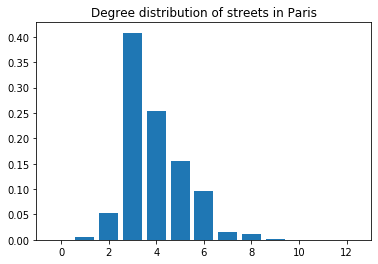

In [14]:
ks, Pk = degreeDistribution(G)

plt.figure()
plt.bar(ks, height = Pk)
plt.title("Degree distribution of streets in Paris")
plt.show()

In [15]:
G = nx.Graph(G)
print("Average Clustering Coefficient of Paris: ", nx.average_clustering(G))
print("Shannon Entropy of the network of Paris: ", shannonEntropy(G))

Average Clustering Coefficient of Paris:  0.06785855672435291
Shannon Entropy of the network of Paris:  1.3959662067422112


## New York

In [16]:
G = nx.read_graphml("New_York.graphml.xml")
print(G.number_of_nodes())

55206


In [17]:
print(G.number_of_edges())

141040


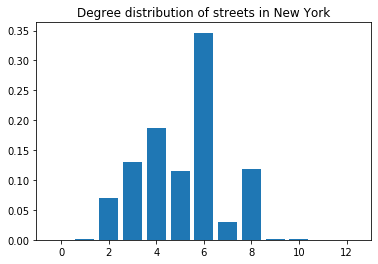

In [18]:
ks, Pk = degreeDistribution(G)

plt.figure()
plt.bar(ks, height = Pk)
plt.title("Degree distribution of streets in New York")
plt.show()

In [19]:
G = nx.Graph(G)
print("Average Clustering Coefficient of New York: ", nx.average_clustering(G))
print("Shannon Entropy of the network of New York: ", shannonEntropy(G))

Average Clustering Coefficient of New York:  0.04081091082232179
Shannon Entropy of the network of New York:  1.4539500109772439


## Analysis 

We have the measures:
<table style="width:80%" align="left">
  <tr>
    <th>Measure</th>  
    <th>Average Clustering Coefficient</th>
    <th>Shannon's Entropy</th>
  </tr>
  <tr>
    <th>Sao Paulo</th>
    <td>0.051</td>
    <td>1.304</td>
  </tr>
  <tr>
    <th>Paris</th>
    <td>0.068</td>
    <td>1.396</td>
  </tr>
  <tr>
    <th>New York</th>
    <td>0.041</td>
    <td>1.454</td>
  </tr>  
</table>

By Shannon's Entropy measures, we have that New York has the most complex network of streets, as well as the lowest clustering coefficient, which means that there aren't as many redundant connections, that is, there are less possible paths from one place to other. So, it's probably the most difficult city to navigate.<br>
Comparing Paris and Sao Paulo, we can see that Paris network is slightly more complex than Sao Paulo's, but, on the other hand, we can also see that Paris has the highest clustering coefficient.<br>Facing this deadlock, we will need to recur to the degree distribution of each network. It's possible to see that the crossroads in Paris have less streets crossing it, which facilitates navigating the city. Therefore, I rank New York, Sao Paulo and Paris increasingly for easiness to navigate.<br>


## Average Shortest Path Length's Complexity

As I tried to run the function <i>nx.average_shortest_path_length(G)</i> on Sao Paulo's network over night and it didn't finished running, I thought that would be more efficient to estimate the time needed, and then taking a decision to run it or not, than just running it.<br><br>
For that, I used my previous knowledge in computational complexity, and tried to learn some new things in Statistics about linear regression.<br> 

You can see the function's documentation <a href="https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html#networkx.algorithms.shortest_paths.generic.average_shortest_path_length">here</a>: <br>

<br>
It's known that the average sorthest path length function calculates the shortest path for each possible pair of nodes in the graph.<br>
For each shorthest path, the Networkx library uses Dijkstra's Algorithm, which complexity is known for being $O(E\cdot log(N))$. As our networks have a mean number of edges related to the number of nodes as $E = \alpha \cdot N$, we can rewrite its complexity as $O(N\cdot log(N))$<br>
As the function run this algorithm for each pair of nodes, we have $\frac{N\cdot (N-1)}{2}$ executions.<br>
So, the complexity of this function can be given by $O(N^3\cdot log(N))$.
Now, for checking if this hypothesis is valid, I will calculate the time elapsed for running this function for different values of $N$, and trying to fit it with a third degree polynomial.

For simulating a geometric network, we will generate a random Strogatz Graph, which is a good aproximation for the networks we're working with.

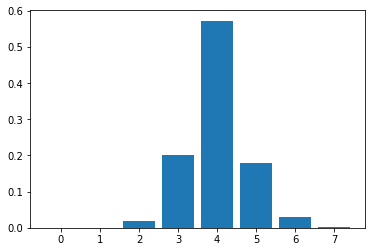

In [17]:
G = nx.watts_strogatz_graph(1000, 4, 0.18)
ks, Pk = degreeDistribution(G)

plt.figure()
plt.bar(ks, height = Pk)
plt.show()

In [18]:
#return a list with the graphs degrees, a list with the time elapsed, and the total time elapsed
def getTimeGeometricGraph(base,step,r,avgdegree,degreevariance):
    sizelist = list() #list containing the values of N
    timelist = list() #list containing the time elapsed for running the function for a N size graph
    
    startloop = time.time()
    for i in range(0,r):
        size = base+i*step
        sizelist.append(size)
        G = nx.watts_strogatz_graph(size, avgdegree, degreevariance)
        start = time.time()
        a = nx.average_shortest_path_length(G)
        end = time.time()
        timelist.append(end-start)
    eloop = time.time()
    
    return sizelist, timelist, eloop-startloop

I will run the average shortest path length function for random geometric graphs with $N$ nodes, $N = (10,60,110,160,...,3010)$, being each node connected with aproximately other 4 nodes. For that, I created the function <i>getTimeGeometricGraph</i>.

After getting the values, I will fit them with a third degree polynomial.

In [19]:
r = 60
step = 50
base = 10

x, y, tim = getTimeGeometricGraph(base,step,r,4,0.18)
print("Time elapsed for all values: ", tim)

degrees = np.polyfit(x,y,3)
p3 = np.poly1d(degrees)
print(p3)

Time elapsed for all values:  1518.1224830150604
           3             2
3.308e-10 x + 7.734e-06 x + 0.0001836 x - 0.03105


The blue line represent the data, and the red line is the estimated function.

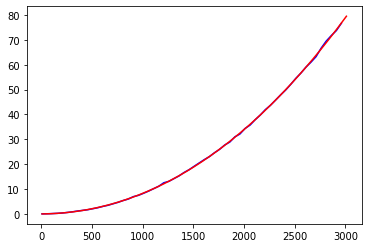

In [20]:
x1 = np.arange(base,base + (step * r))
y1 = p3(x1)
plt.plot(x,y,'b')
plt.plot(x1, y1,'r')
plt.show()

In [21]:
print(degrees)

[ 3.30793547e-10  7.73412244e-06  1.83607799e-04 -3.10466330e-02]


Applying this function to estimate the time needed to calculate the average shortest path length for each city, we have:<br>

In [23]:
degrees = [ 3.30793547e-10,7.73412244e-06,  1.83607799e-04, -3.10466330e-02]
pn = np.poly1d(degrees)
print("\nSao Paulo: ", pn(112039),"\nParis: ", pn(10104),"\nNew York: ", pn(55206))


Sao Paulo:  562331.7230930881 
Paris:  1132.6290111658902 
New York:  79237.90647309781


Sao Paulo: 562331 seconds(6.5 days).<br>
Paris:     1132 seconds(19 minutes).<br>
New York:  79237 seconds(22 hours).<br>

Therefore, I will calculate the measure just for Paris.

In [22]:
G = nx.read_graphml("Paris.graphml.xml")
start = time.time()
value = nx.average_shortest_path_length(G)
end = time.time()
print("Average Shortest Path Length: ", value)
print("Time elapsed: ", end-start)
print("Estimated time: ", p3(G.number_of_nodes()))

Average Shortest Path Length:  46.695331014148884
Time elapsed:  1086.5500361919403
Estimated time:  1132.629011063905
